# How to Train YOLOv9 on a Custom Dataset
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/XHT2c8jT3Bc)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Apr 24 09:39:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.113.01             Driver Version: 535.113.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off | 00000000:01:00.0  On |                  N/A |
| 19%   62C    P2              64W / 250W |   3577MiB / 11264MiB |     11%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/robolab/Downloads


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [4]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 325 (delta 165), reused 264 (delta 162), pack-reused 0
Receiving objects: 100% (325/325), 2.23 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/home/robolab/Downloads/yolov9/yolov9


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [5]:
!pip install -q roboflow

## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [6]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [7]:
!ls -la {HOME}/weights

total 402440
drwxrwxr-x  2 robolab robolab      4096 abr 24 10:12 .
drwxr-xr-x 13 robolab robolab      4096 abr 24 10:12 ..
-rw-rw-r--  1 robolab robolab  51508261 feb 18 13:36 gelan-c.pt
-rw-rw-r--  1 robolab robolab 117203713 feb 18 13:36 gelan-e.pt
-rw-rw-r--  1 robolab robolab 103153312 feb 18 13:36 yolov9-c.pt
-rw-rw-r--  1 robolab robolab 140217688 feb 18 13:36 yolov9-e.pt


## Detection with pre-trained COCO model

**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [ ]:
%cd {HOME}/yolov9

**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [20]:
dataset =  '/home/robolab/Downloads/yolov9'
import torch
torch.cuda.empty_cache()

## Train Custom Model

In [41]:
%cd {HOME}/yolov9/yolov9

!python train_dual.py \
--batch 5 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 10 \
--data {dataset}/data.yaml \
--weights {HOME}/weights/yolov9-c.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/home/robolab/Downloads/yolov9/yolov9
train_dual: weights=/home/robolab/Downloads/weights/yolov9-c.pt, cfg=models/detect/yolov9-c.yaml, data=/home/robolab/Downloads/yolov9/data.yaml, hyp=hyp.scratch-high.yaml, epochs=10, batch_size=5, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=10, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.7.12 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11002MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [43]:
!ls {HOME}/yolov9/yolov9/runs/train/exp22/

confusion_matrix.png			     results.png
events.out.tfevents.1713959641.ws7.633201.0  train_batch0.jpg
F1_curve.png				     train_batch1.jpg
hyp.yaml				     train_batch2.jpg
labels_correlogram.jpg			     val_batch0_labels.jpg
labels.jpg				     val_batch0_pred.jpg
opt.yaml				     val_batch1_labels.jpg
P_curve.png				     val_batch1_pred.jpg
PR_curve.png				     val_batch2_labels.jpg
R_curve.png				     val_batch2_pred.jpg
results.csv				     weights


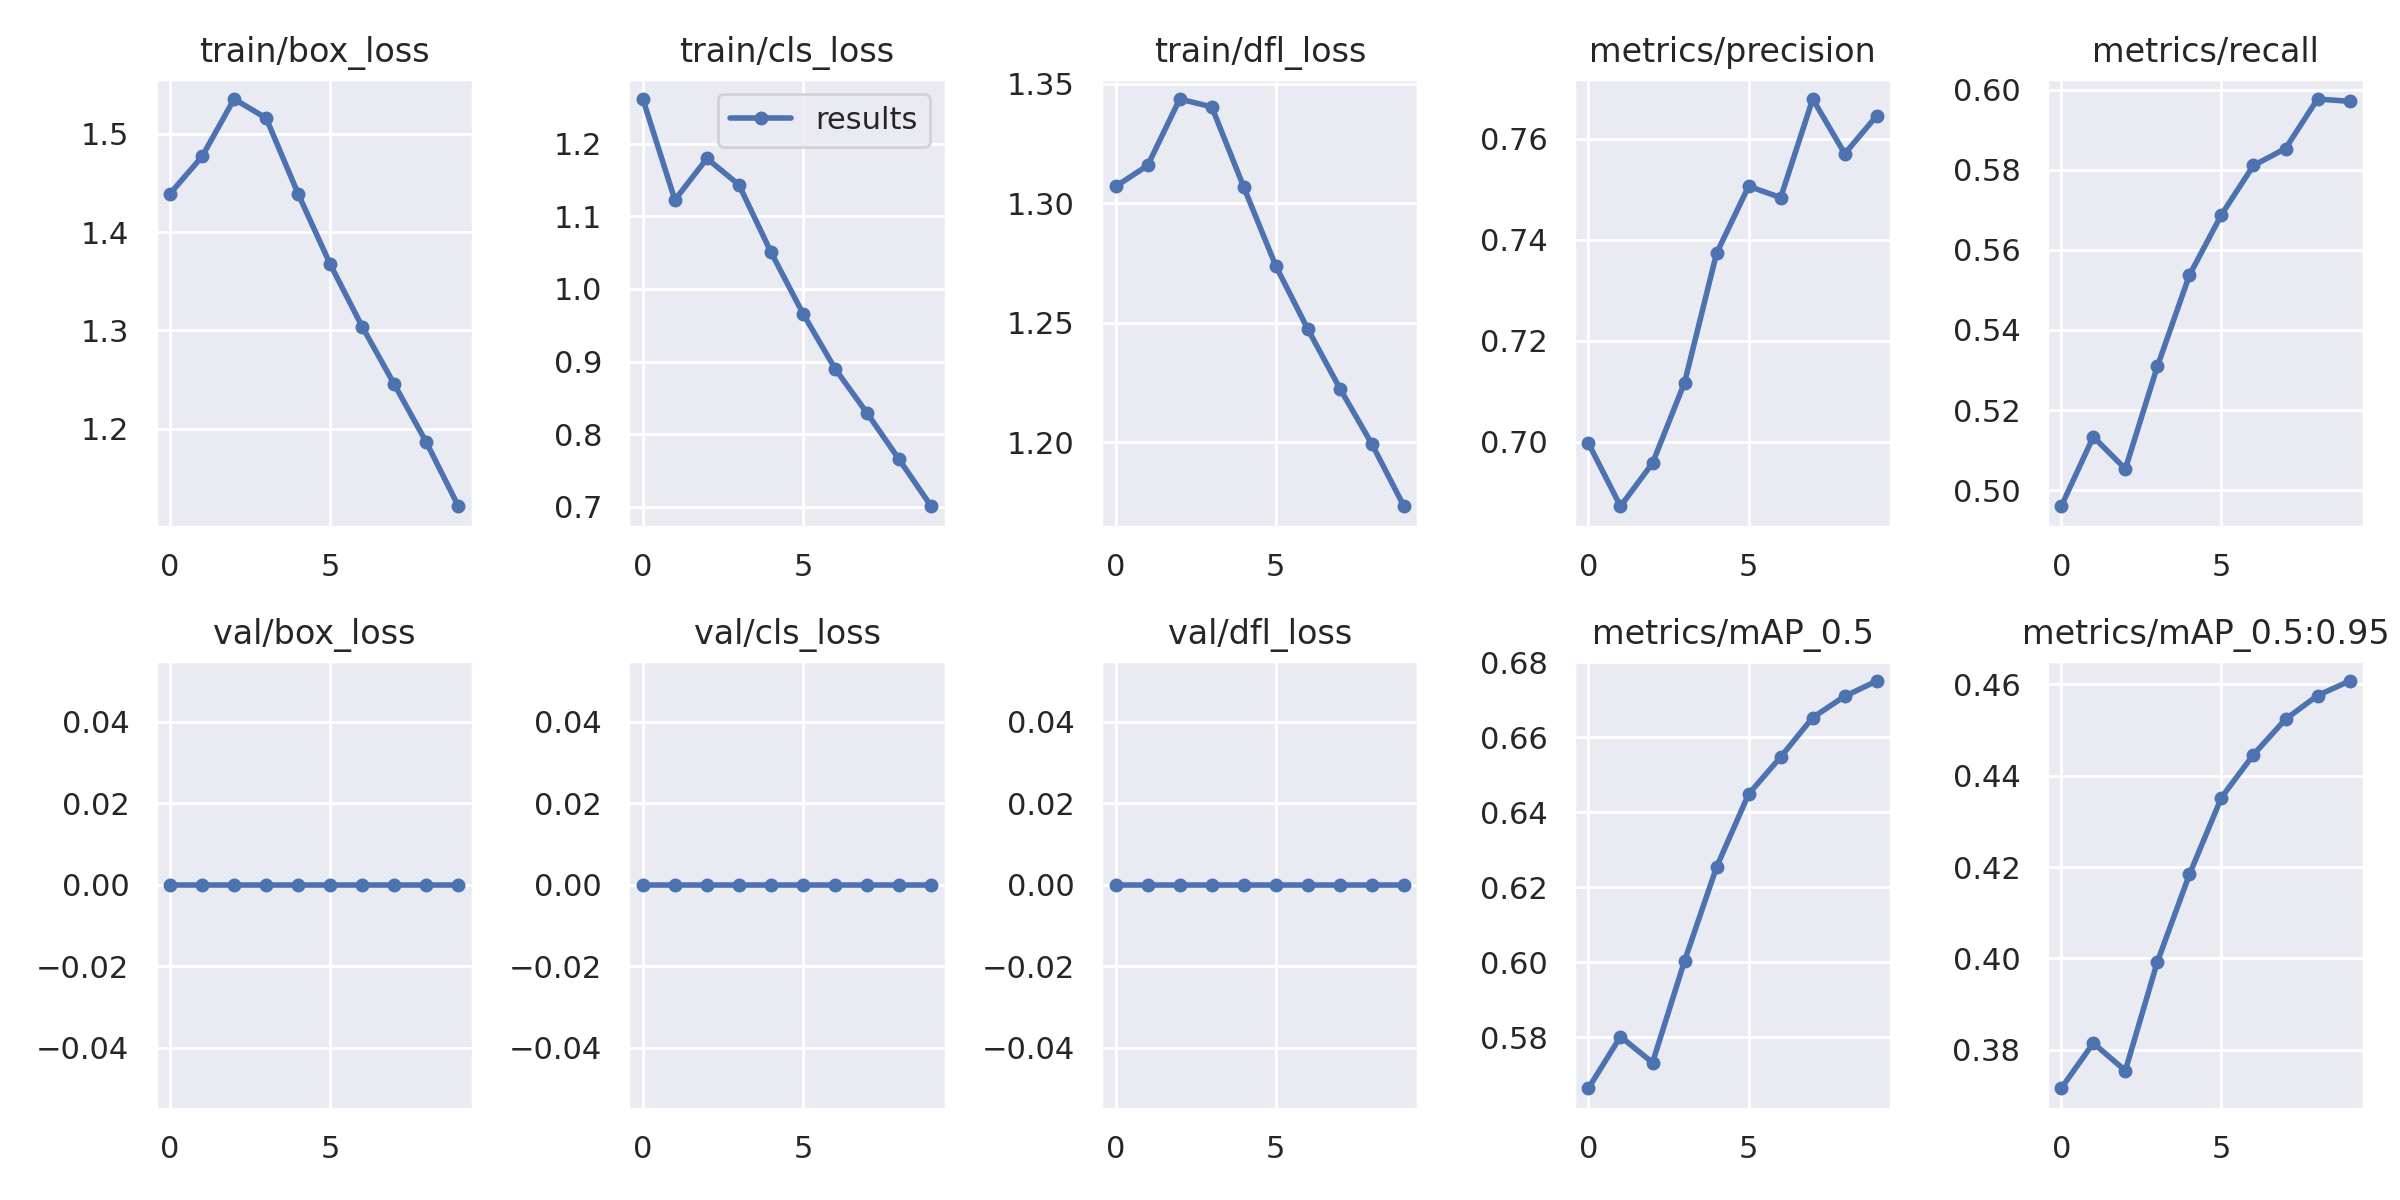

In [47]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/yolov9/runs/train/exp22/results.png", width=1000)

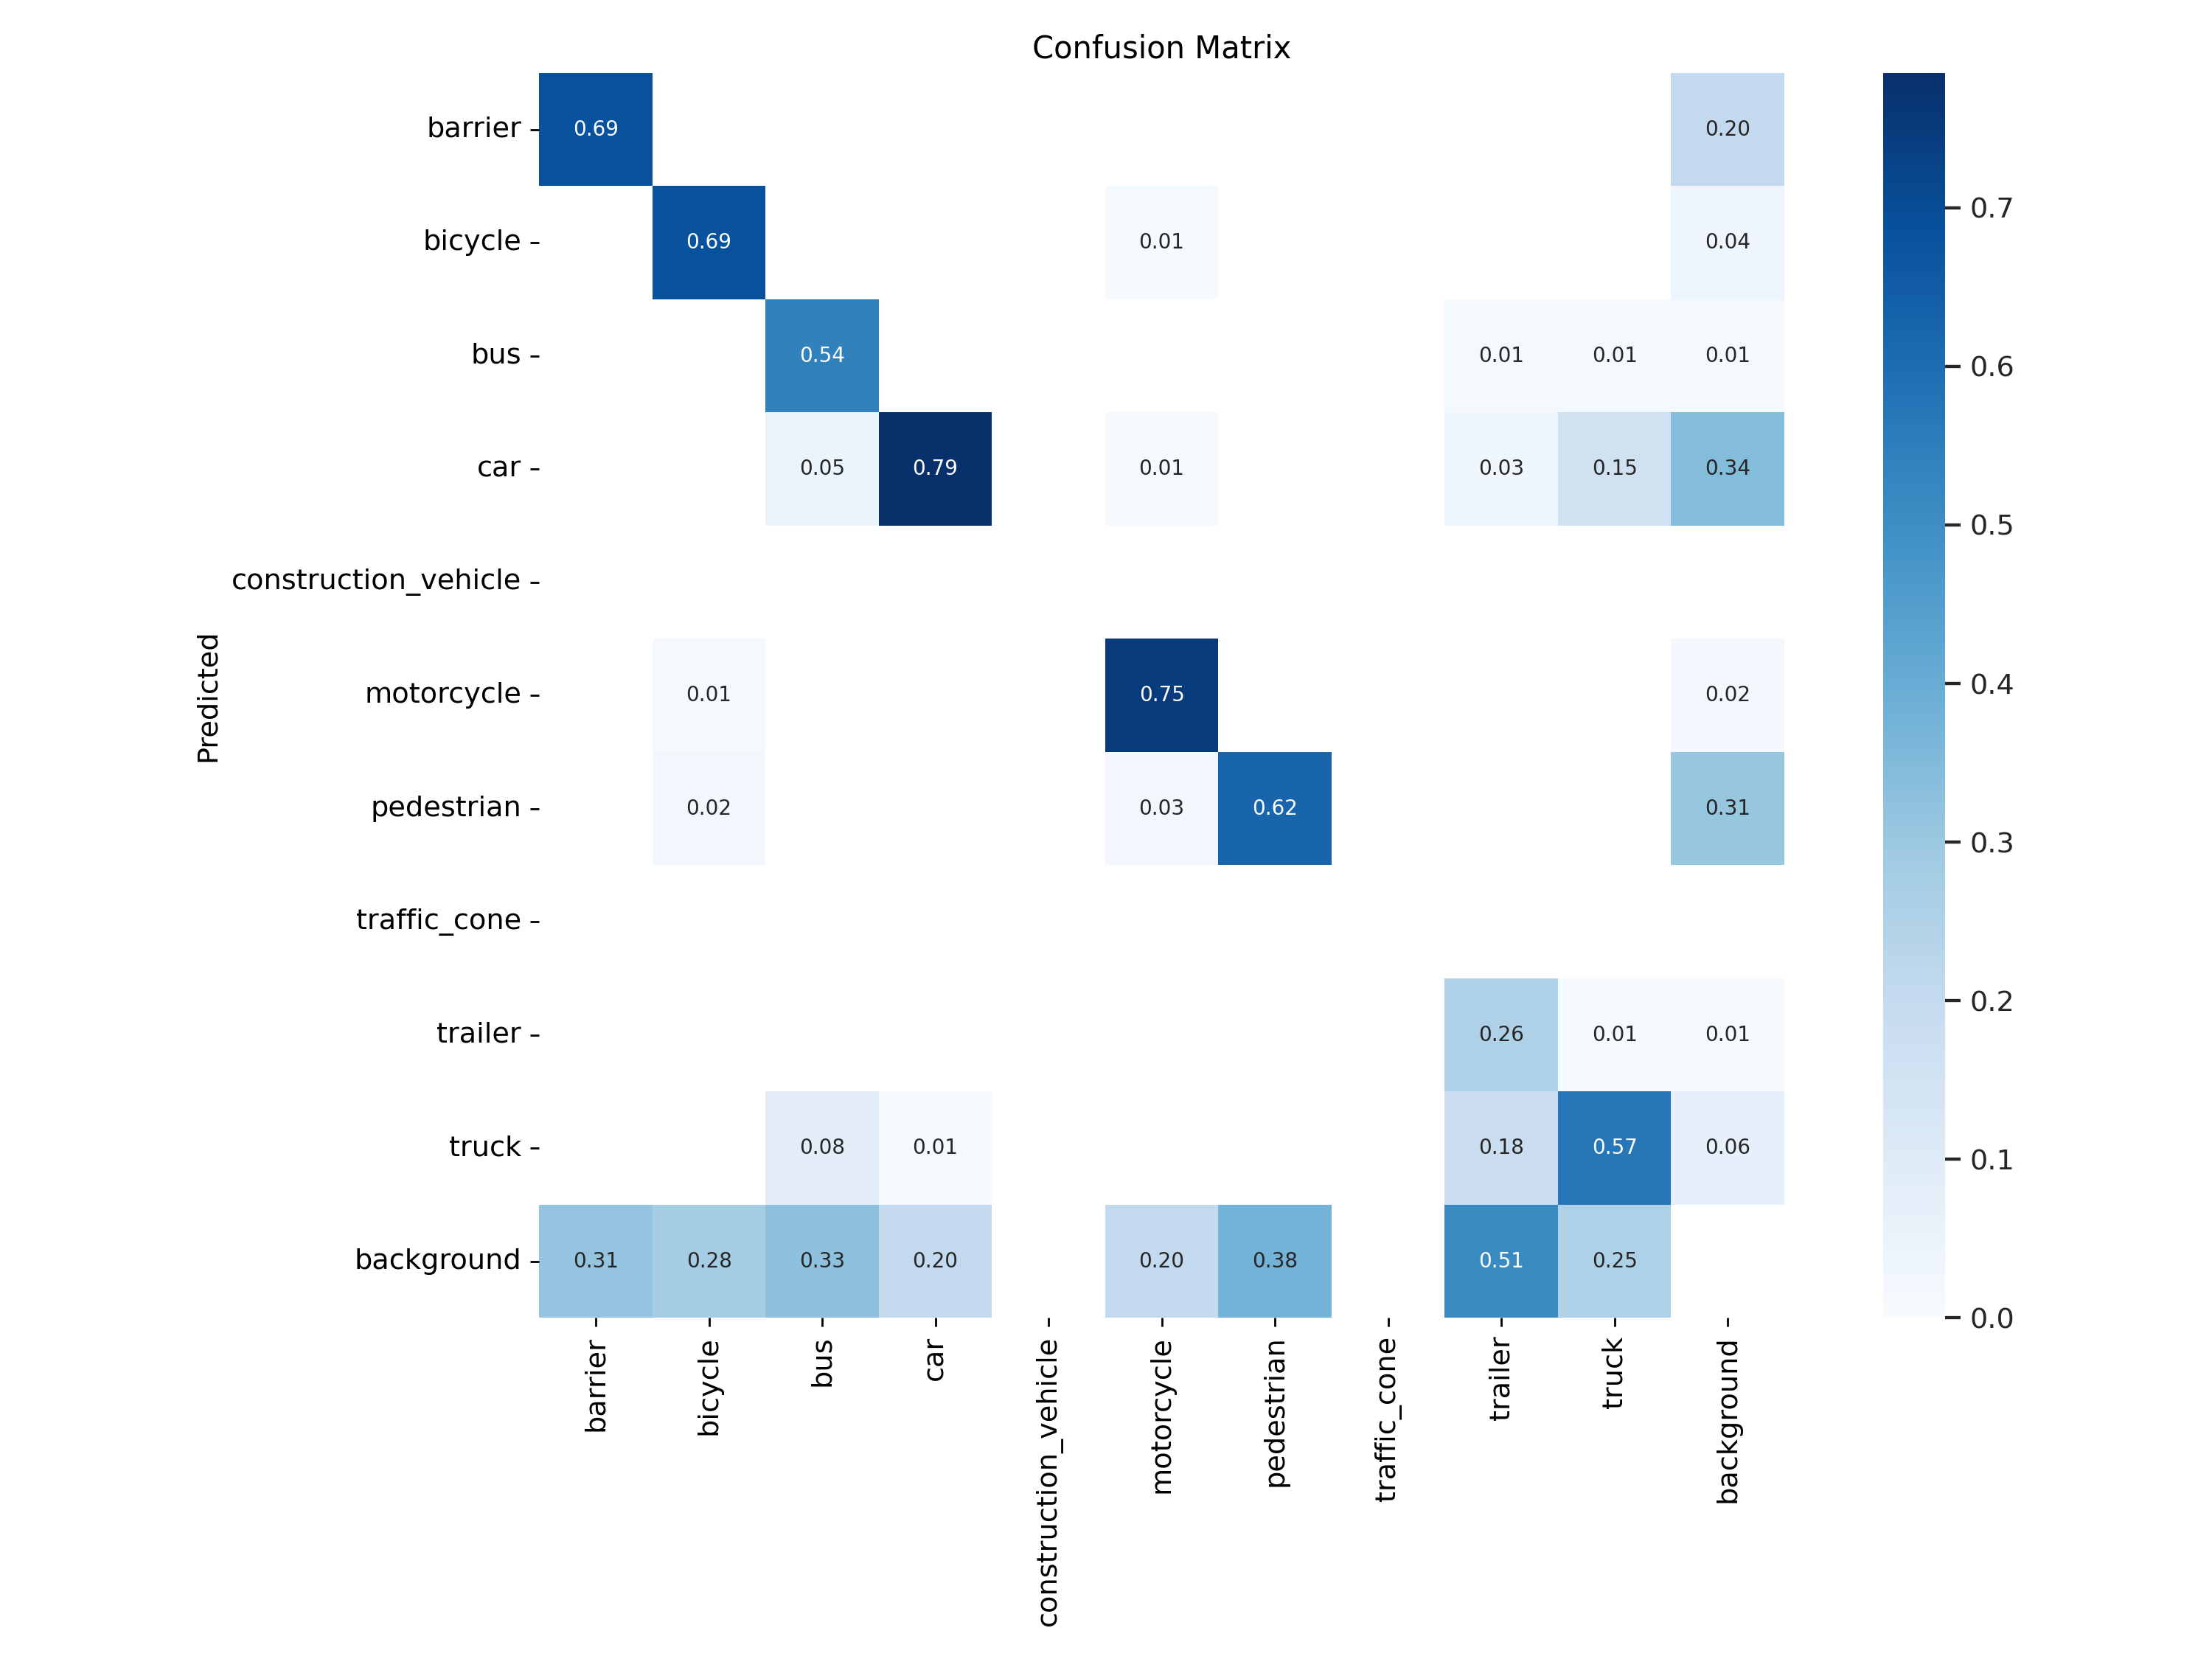

In [48]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/yolov9/runs/train/exp22/confusion_matrix.png", width=1000)

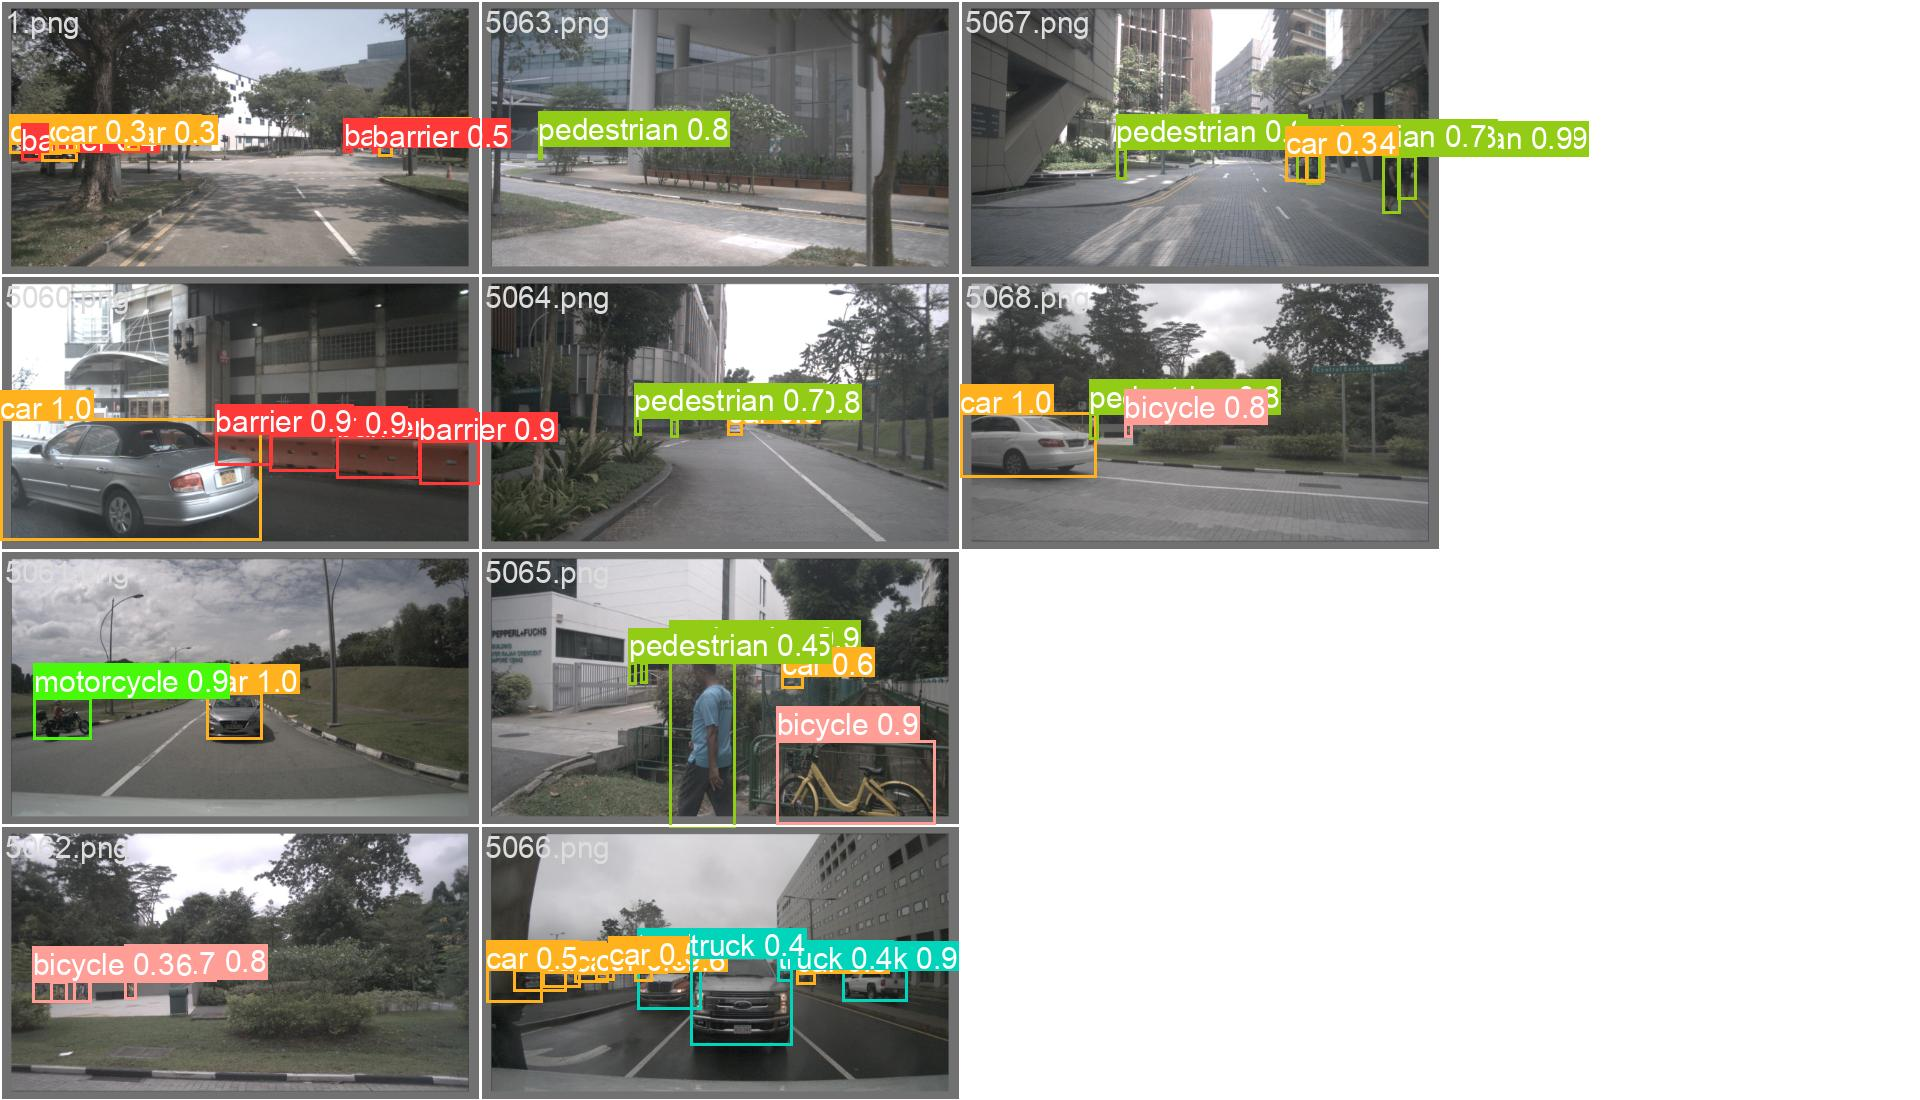

In [49]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/yolov9/runs/train/exp22/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [58]:
%cd {HOME}/yolov9/yolov9

!python val_dual.py \
--img 1280 --batch 5 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset}/data.yaml \
--weights {HOME}/yolov9/yolov9/runs/train/exp22/weights/best.pt

/home/robolab/Downloads/yolov9/yolov9
val_dual: data=/home/robolab/Downloads/yolov9/data.yaml, weights=['/home/robolab/Downloads/yolov9/yolov9/runs/train/exp22/weights/best.pt'], batch_size=5, imgsz=1280, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.7.12 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11002MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50979420 parameters, 0 gradients, 237.8 GFLOPs
val: Scanning /home/robolab/Downloads/yolov9/val/labels.cache... 16429 images, 1
val: WARNING ⚠️ /home/robolab/Downloads/yolov9/val/images/1610.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0006]
                 Class     Images  Instances          P          R      mAP50   
            